In [1]:
#https://www.kaggle.com/rodsaldanha/arketing-campaign
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("marketing_campaign.csv", sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Marital_Status'])
df['Marital_Status']=le.transform(df['Marital_Status'])

df.head()      

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
le.fit(df['Education'])
df['Education']=le.transform(df['Education'])

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df2=df.drop(['ID','Year_Birth','Dt_Customer'],axis=1)

In [9]:
df2=df2.dropna()

In [12]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(df2)
scaled_df = pd.DataFrame(s.transform(df2), columns = df2.columns )

In [14]:
X=scaled_df.to_numpy()

In [15]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np

X=np.array(X)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [16]:
PCA_X=pca.transform(X)

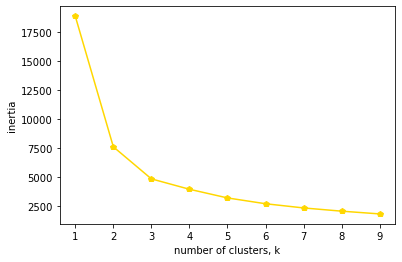

In [17]:
#Elbo method for selecting optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(PCA_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

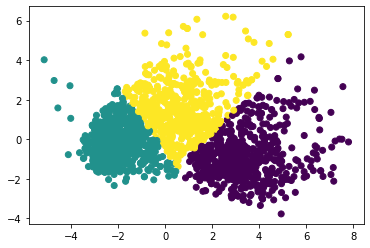

In [41]:
model = KMeans(n_clusters=3)
model.fit(PCA_X)

labels = model.predict(PCA_X)
plt.scatter(PCA_X.T[0], PCA_X.T[1], c=labels)
plt.show()

In [29]:
cluster_0_dates=[]
cluster_1_dates=[]
cluster_2_dates=[]

for i in np.arange(labels.shape[0]):
    if labels[i]==0:
        cluster_0_dates.append(df["Year_Birth"][i])
    elif labels[i]==1:
        cluster_1_dates.append(df["Year_Birth"][i])
    elif labels[i]==2:
        cluster_2_dates.append(df["Year_Birth"][i])
    else:    
        pass

(array([  1.,   0.,   0.,   0.,  18.,  99.,  99., 177., 123.,  37.]),
 array([1899. , 1908.7, 1918.4, 1928.1, 1937.8, 1947.5, 1957.2, 1966.9,
        1976.6, 1986.3, 1996. ]),
 <BarContainer object of 10 artists>)

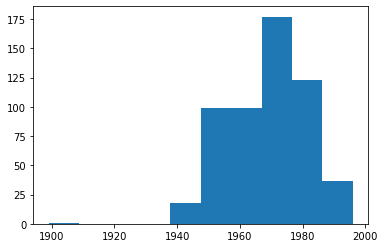

In [30]:
#Histogram of birthdates in the first cluster
plt.hist(cluster_0_dates)

(array([  1.,   0.,   0.,   0.,  10.,  93., 119., 168., 123.,  59.]),
 array([1900. , 1909.4, 1918.8, 1928.2, 1937.6, 1947. , 1956.4, 1965.8,
        1975.2, 1984.6, 1994. ]),
 <BarContainer object of 10 artists>)

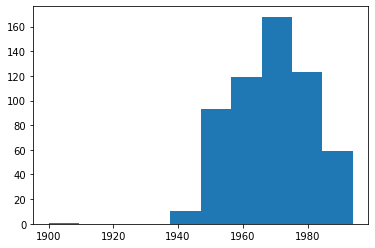

In [31]:
#Histogram of birthdates in the second cluster
plt.hist(cluster_1_dates)

(array([  1.,   0.,   0.,   0.,   6., 156., 268., 344., 233.,  81.]),
 array([1893. , 1903.3, 1913.6, 1923.9, 1934.2, 1944.5, 1954.8, 1965.1,
        1975.4, 1985.7, 1996. ]),
 <BarContainer object of 10 artists>)

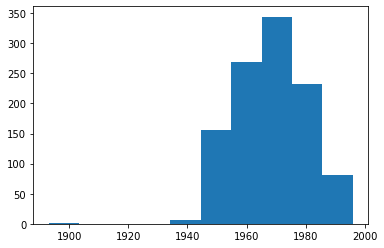

In [32]:
plt.hist(cluster_2_dates)

In [73]:
#Prediction of response to marketing campaign using Random Forest
df4=df.drop(['ID','Year_Birth','Dt_Customer','Response'],axis=1)
df4=df4.dropna()

In [74]:
df6=df.dropna()
y=np.array(df6['Response'])

In [75]:
X=df4.to_numpy()

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2)

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8790613718411552
